In [1]:
import numpy as np
import skfuzzy as fz
from skfuzzy import control as ctrl

In [2]:
### Xây dựng không gian nền tương ứng
#Không gian nên dunh tích bể
X = np.arange(0,2,0.1)
#Không gian nền bồn
Y = X
#Không gian nền thời gian bơm
Z = np.arange(0,31,1)

In [3]:
### Xác định tiền đề và kết luận
### C: Bể
C = ctrl.Antecedent( X,"Bể" )
### T: Bồn
T = ctrl.Antecedent( Y,"Bồn" )
### G: Thời gian
G = ctrl.Consequent( Z,"Thời gian" )

C:\Users\ngodi\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


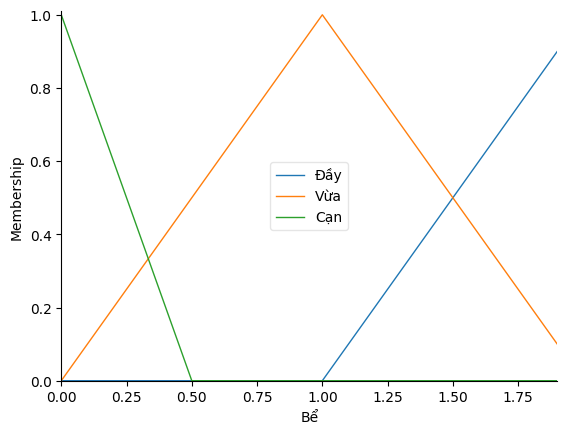

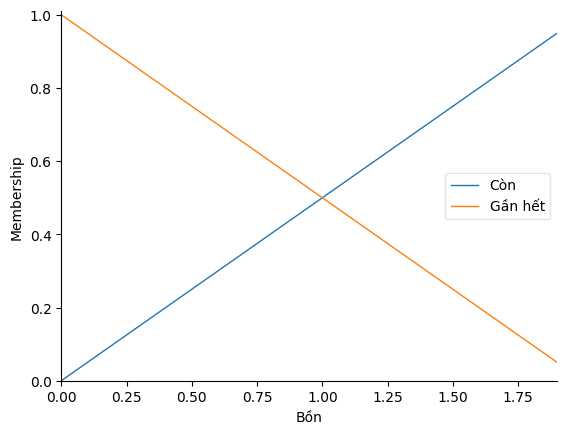

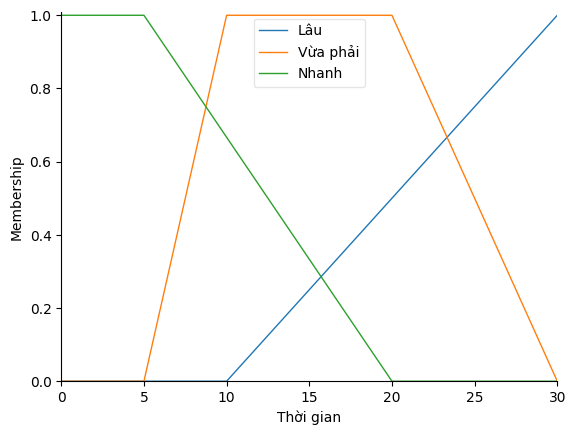

In [4]:
### Các tập mờ bể
C["Đầy"] = fz.trimf( C.universe,[1,2,2] )
C["Vừa"] = fz.trimf( C.universe,[0,1,2] )
C["Cạn"] = fz.trimf( C.universe,[0,0,1] )
C.view()
### các tập mở bồn
T["Còn"] = fz.trimf( T.universe,[0,2,2] )
T["Gần hết"] = fz.trimf( T.universe,[0,0,2] )
T.view()

#Các tập mờ thời gian
G["Lâu"] = fz.trimf( G.universe,[10,30,30] )
G["Vừa phải"] = fz.trapmf( G.universe,[5,10,20,30] )
G["Nhanh"] = fz.trapmf( G.universe,[0,0,5,20] )
G.view()

In [5]:
### Đưa các luật vào
R1 = ctrl.Rule( C["Đầy"] & T["Còn"], G["Nhanh"] )
R2 = ctrl.Rule( C["Vừa"] & T["Còn"], G["Vừa phải"] )
R3 = ctrl.Rule( C["Cạn"] & T["Còn"], G["Lâu"] )
R4 = ctrl.Rule( C["Đầy"] & T["Gần hết"], G["Nhanh"] )
R5 = ctrl.Rule( C["Vừa"] & T["Gần hết"], G["Nhanh"] )
R6 = ctrl.Rule( C["Cạn"] & T["Gần hết"], G["Vừa phải"] )
### Tạo mô hình đề suy diễn
model = ctrl.ControlSystemSimulation(ctrl.ControlSystem([R1,R2,R3,R4,R5,R6]))

Dung tính bồn: 1
Dung tích bể : 1
Với nước trên bồn 1.00 m3 và trong bể 1.00 m3, thời gian bơm : 14 phút


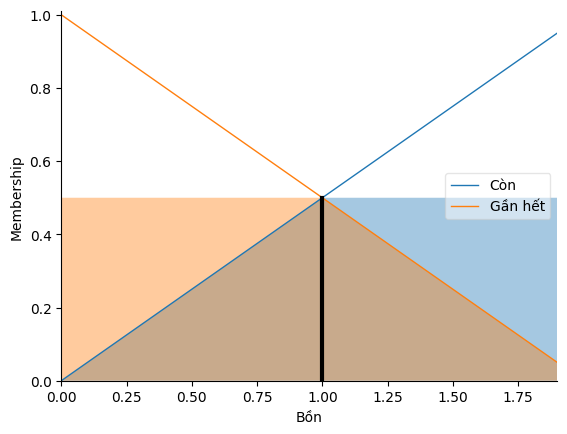

In [6]:
### Đưa dữ liệu vào để xử lý rồi xuất kết quả
B = float(input( "Dung tính bồn: " ))
C = float(input( "Dung tích bể : " ))
model.input["Bồn"] = B
model.input["Bể"] = C
model.compute()
D = model.output["Thời gian"]
print('Với nước trên bồn %.2f m3 và trong bể %.2f m3, thời gian bơm : %2.f phút' % (B,C,D) )
T.view(model)

#### 